In [214]:
%matplotlib inline

In [254]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Dense, Activation, Dropout, Flatten, Embedding, LSTM, Conv2D, MaxPooling2D
from keras.optimizers import SGD

In [153]:
import pandas as pd
from sklearn.preprocessing import scale, normalize, MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt

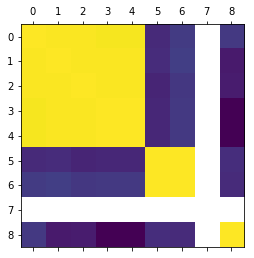

In [69]:
plt.matshow(df.corr())

In [174]:
def get_tables(name):
    return_array = []
    for file_name in name:
        df = pd.read_csv(file_name)
        df.Date = pd.to_datetime(df.Date)
        df['Moment'] = df.Open - df.Last
        df.iloc[:,-1:]=df.iloc[:,-1:].apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
        df.iloc[:,1:-1]=df.iloc[:,1:-1].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
        return_array.append(df)
        df = df.reindex(index=df.index[::-1])
    return return_array

In [175]:
pd_obj = get_tables(['NSE-APTECHT.csv','NSE-INFY.csv','NSE-TCS.csv'])

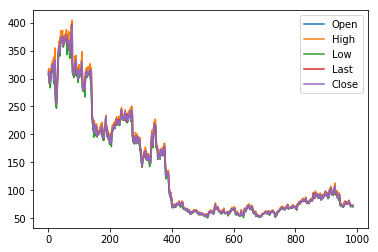

In [222]:
a = pd.read_csv('NSE-APTECHT.csv')
a.iloc[:,:-2].plot()

In [233]:
# Features variable
obj1 = pd_obj[0].copy()
dummy = []
size=30
for i in range(obj1.shape[0],size,-1):
    dummy.append(obj1.iloc[i-size:i,1:6].values)
dummy = np.array(dummy)
X = dummy.copy()

In [234]:
# Target Variables
y = obj1.Moment.iloc[-size+1::-1].values
X[0], y[0]

(array([[ 0.06178161,  0.06061468,  0.06723979,  0.05974251,  0.05964504],
        [ 0.06666667,  0.07413204,  0.06693276,  0.06162303,  0.06080884],
        [ 0.07054598,  0.06787137,  0.07599018,  0.06827716,  0.06808263],
        [ 0.07212644,  0.06972112,  0.07737181,  0.06972371,  0.06997381],
        [ 0.0829023 ,  0.07953899,  0.08044212,  0.07276146,  0.07288333],
        [ 0.06695402,  0.07555492,  0.07583666,  0.07840301,  0.07812045],
        [ 0.0670977 ,  0.07029027,  0.07599018,  0.06871112,  0.06895548],
        [ 0.06968391,  0.06915196,  0.0772183 ,  0.06885578,  0.06924644],
        [ 0.06752874,  0.06972112,  0.07645072,  0.06856647,  0.06953739],
        [ 0.06882184,  0.07598179,  0.07675775,  0.07059164,  0.07011929],
        [ 0.07054598,  0.06972112,  0.07384096,  0.06827716,  0.0676462 ],
        [ 0.06896552,  0.07285145,  0.07675775,  0.07088095,  0.07099214],
        [ 0.07327586,  0.07285145,  0.0772183 ,  0.06928974,  0.06982834],
        [ 0.07227011,  0.

In [298]:
batch_size=5
epochs=1000


prediction_model = Sequential()
prediction_model.add(LSTM(32,batch_input_shape=(batch_size,size,5), return_sequences=False,
                    stateful=False))
MaxPooling1D(pool_size=2, strides=None, padding='valid')
prediction_model.add(Dropout(0.4))
prediction_model.add(Dense(1, activation='relu'))

prediction_model.compile(loss='mean_squared_error',
                         optimizer='rmsprop',
                         metrics=['accuracy','mae'])

NameError: name 'keras' is not defined

In [291]:
indx = int(X.shape[0]*0.8)
X_train, X_test = X[:indx,:], X[indx:,:]
y_train, y_test = y[:indx], y[indx:]

In [292]:
X_train.shape

(765, 30, 5)

In [293]:
prediction_model.fit(X_train, y_train, batch_size=batch_size,
                     epochs=epochs, shuffle=False)

Epoch 1/1000
765/765 [==============================] - 4s 5ms/step - loss: 0.0018 - acc: 0.0000e+00 - mean_absolute_error: 0.0254
Epoch 2/1000
765/765 [==============================] - 2s 3ms/step - loss: 0.0018 - acc: 0.0000e+00 - mean_absolute_error: 0.0254
Epoch 3/1000
765/765 [==============================] - 2s 3ms/step - loss: 0.0018 - acc: 0.0000e+00 - mean_absolute_error: 0.0254
Epoch 4/1000
765/765 [==============================] - 2s 3ms/step - loss: 0.0018 - acc: 0.0000e+00 - mean_absolute_error: 0.0254
Epoch 5/1000
765/765 [==============================] - 2s 3ms/step - loss: 0.0018 - acc: 0.0000e+00 - mean_absolute_error: 0.0254
Epoch 6/1000
765/765 [==============================] - 2s 3ms/step - loss: 0.0018 - acc: 0.0000e+00 - mean_absolute_error: 0.0254
Epoch 7/1000
765/765 [==============================] - 3s 3ms/step - loss: 0.0018 - acc: 0.0000e+00 - mean_absolute_error: 0.0254
Epoch 8/1000
765/765 [==============================] - 2s 3ms/step - loss: 0.0018 

KeyboardInterrupt: 

In [276]:
model = Sequential()

model.add(Conv2D(filters=32, kernel=3, padding='same', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

TypeError: __init__() missing 1 required positional argument: 'kernel_size'

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32)